# Hand Washing Analysis -  Dr. Ignaz Semmelweis
Dr. Ignaz Semmelweis meniliti sebuah fenomena Childbed Fever yang terjadi pada ibu melahirkan yang mengakibatkan kematian. Dr. Ignaz berfikir bahwa penyakit Childbed Fever disebabkan oleh bakteri yang ada pada tangan. Maka dari itu, beliau menyuruh untuk mencuci tangan namun sayangnya tidak ada yang mendengar.

Projek ini adalah untuk menganalisa apakah dengan mencuci tangan dapat memberikan dampak terhadap kematian ibu melahirkan yang disebabkan Chilbed Fever. 

Projek ini memerlukan kemampuan sebagai berikut:
1. Statistika Deskriptif dan Inferensial
1. Visualisasi Data
1. Data Manipulasi

Pengerjaan projek ini melalui tahap-tahap sebagai berikut:
1. [Data Retrieving](#1)
2. [Data Cleaning](#2)
3. [Data Analysing](#3)

<a id='1'></a>
## Data Retrieving

Pada tahap ini, kita akan membaca data untuk mengetahui apa yang tersaji di data dan apa yang dapat digali.

In [1]:
# import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
yearly_df=pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
yearly_df.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [3]:
monthly_df=pd.read_csv('datasets/monthly_deaths.csv',parse_dates=['date'])
monthly_df

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


<a id=2></a>
## Data Cleaning
Pada proses ini, kita akan melakukan inspeksi apakah terdapat missing value, ketidak-sesuian tipe data atau outlier dan bagaimana penanganannya.

In [4]:
yearly_df.info() # Inspeksi: tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [5]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [6]:
yearly_df.clinic=yearly_df.clinic.astype('category') # Penanganan: mengubah feature category ke tipe data category
yearly_df.info() # Pengecekan ulang 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   year    12 non-null     int64   
 1   births  12 non-null     int64   
 2   deaths  12 non-null     int64   
 3   clinic  12 non-null     category
dtypes: category(1), int64(3)
memory usage: 552.0 bytes


#### Missing Value

In [7]:
miss_val_check = lambda x:x.isna().sum()

In [8]:
miss_val_check(yearly_df) # Inspeksi: missing value

year      0
births    0
deaths    0
clinic    0
dtype: int64

In [9]:
miss_val_check(monthly_df)

date      0
births    0
deaths    0
dtype: int64

Hasil Observasi adalah tidak terdapat missing value

#### Outlier Value

In [10]:
yearly_df.describe() # Inspeksi: mengecek outlier

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [11]:
monthly_df.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


Text(0.5, 1.0, 'Monthly')

<Figure size 720x360 with 0 Axes>

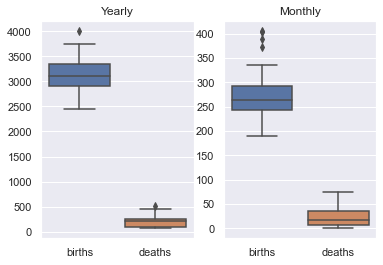

In [12]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(1,2)
sns.boxplot(
    data=yearly_df[['births','deaths']],
    ax=ax[0])
sns.boxplot(
    data=monthly_df,
    ax=ax[1])
# plt.clf()
ax[0].set_title('Yearly')
ax[1].set_title('Monthly')

Hasil observasi adalah karena semua feature adalah data cumulative maka konsep outlier tidak ada

<a id=3></a>
## Data Analysing
Proses ini adalah proses memahami data, mencari pertanyaan yang dapat dihasilkan oleh data, mencari solusinya

In [13]:
yearly_df.head(10)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


Hasil Observasi adalah pertanyaan yang dihasilkan oleh data ini adalah berapakah proporsi kematian di tiap tahunnya

In [14]:
yearly_df['proportion_deaths']=yearly_df.deaths/yearly_df.births # Menghitung proporsi kematian dan memasukannya ke data proportion_deaths
yearly_df.head()

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


Setelah mendapatkan proporsi kematian, selanjutnya pertanyaan yang dapat dihasilkan adalah manakah proporsi yang lebih besar antara clinic 1 dan clinic 2?

In [15]:
yearly_df_clinic1=yearly_df[yearly_df.clinic == 'clinic 1']
yearly_df_clinic1


,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [16]:
yearly_df_clinic2=yearly_df[yearly_df.clinic == 'clinic 2']
yearly_df_clinic2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


In [17]:
def line_plots(x,y,*args,label_1=None,label_2=None,ax=None):
    if ax:
        ax=args[0].plot.line(
            x=x,
            y=y,
            label=label_1 if label_1 else y.replace('_',' ').title()
        )
        args[1].plot.line(
            x=x,
            y=y,
            label=label_2 if label_2 else y.replace('_',' ').title(),
            ax=ax
        )
    else:
        args[0].plot.line(
            x=x,
            y=y,
            label=label_1 if label_1 else y.replace('_',' ').title())
    plt.xlabel(x.replace('_',' ').title())
    plt.ylabel(y.replace('_',' ').title())
    
    

Text(0.5, 1.0, 'Clinic 1 and Clinic 2 Comparison')

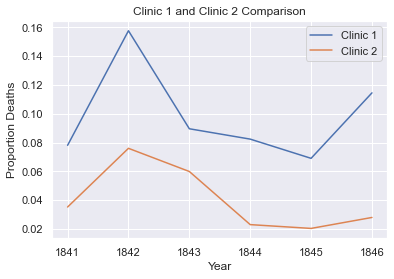

In [18]:
line_plots(
    'year',
    'proportion_deaths',
    yearly_df_clinic1,
    yearly_df_clinic2,
    label_1='Clinic 1',
    label_2='Clinic 2',
    ax=True
)

plt.title('Clinic 1 and Clinic 2 Comparison')

Hasil Observasi di atas menjelaskan bahwa Proporsi kematian pada clinic 1 lebih besar dari clinic 2. Setelah di teliti, ternyata di clinic 1 kebanyakan adalah mahasiswa kedokteran yang menghabiskan waktunya di ruang otopsi, sedang kan di clinic 2 kebanyakan bidan yang tugasnya adalah untuk membantu persalinan.

Dr. Ignaz mencurigai bahwa terdapat sesuatu di tangan mahasiswa setelah berada di ruang otopsi. Akhirnya beliau menyuruh untuk mencuci tangan yang pada saat itu adalah hal kontroversi karena belum ditemukannya bakteri yang terdapat pada tangan.

## Memulai Penelitian Hand washing

Untuk dapat melihat perkembangan dari mencuci tangan, maka langkah awal adalah menghitung proporsi kematian, setelah itu memisahkan data sebelum cuci tangan dan data setelah cuci tangan

In [41]:
monthly_df['proportion_deaths']=monthly_df.deaths/monthly_df.births
monthly_df.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


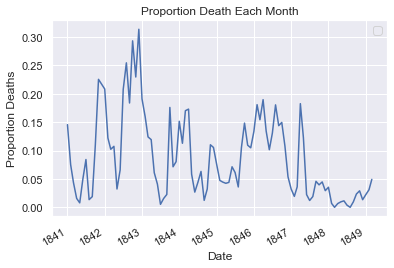

In [40]:
line_plots('date','proportion_deaths',monthly_df)
plt.title('Proportion Death Each Month')
plt.legend('')

Data setelah mencuci tangan dimulai pada tanggal 1847-06-01

In [23]:
handwashing_start=pd.to_datetime('1847-06-01')
handwashing_start

Timestamp('1847-06-01 00:00:00')

In [26]:
monthly_df_before=monthly_df[monthly_df.date < handwashing_start] # sebelum mencuci tangan
monthly_df_before.head() 

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [27]:
monthly_df_after=monthly_df[monthly_df.date >= handwashing_start] # sesudah mencuci tangan
monthly_df_after.head()

,date,births,deaths,proportion_deaths
76,1847-06-01,268,6,0.022388
77,1847-07-01,250,3,0.012000
78,1847-08-01,264,5,0.018939
79,1847-09-01,262,12,0.045802
80,1847-10-01,278,11,0.039568


Text(0.5, 1.0, 'Before and After Handwashing')

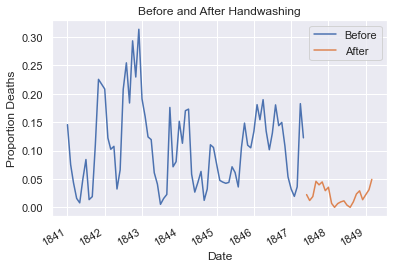

In [29]:
line_plots(
    'date',
    'proportion_deaths',
    monthly_df_before,
    monthly_df_after,
    label_1='Before',
    label_2 ='After',
    ax=True
)
plt.title('Before and After Handwashing')

Lewat visualisasi di atas terlihat bahwa grafik setelah mencuci tangan cenderung rendah. Namun apakah benar lebih rendah? Untuk memastikan, kita bisa melihat dari perbedaan rata-rata data tersebut.

In [35]:
proportion_deaths_before=monthly_df_before.proportion_deaths
proportion_deaths_after=monthly_df_after.proportion_deaths
diff_means=proportion_deaths_after.mean()-proportion_deaths_before.mean()
print(proportion_deaths_after.mean(),proportion_deaths_before.mean())
print(diff_means)

0.021093375097254535 0.10504998260908789
-0.08395660751183336


Perbedaan rata-rata yang dihasilkan adalah sekitar 8% dari 10%. Yang mana perbedaan ini sangat besar, Mencuci tangan sebelum persalinan sangat mengurangi tingkat kematian. Untuk dapat lebih yakin dengan hal-hal yang tidak pasti maka kita bisa mengurangi ketidakpastian dengan bootstraping. 

In [60]:
boot_diff_mean=[]
for i in range(5000):
    before=np.random.choice(proportion_deaths_before,size=len(proportion_deaths_before))
    after=np.random.choice(proportion_deaths_after,size=len(proportion_deaths_after))
    boot_diff_mean.append(after.mean()-before.mean())

pd.Series(boot_diff_mean).quantile([.025,.975])

0.025   -0.101069
0.975   -0.067131
dtype: float64

Hasil di atas menjelaskan bahwa dengan mencuci tangan mampu mengurangi kematian sekitar 6 - 10 % dari angka proporsi kematian. 

Maka keputusan mencuci tangan sebelum persalinan adalah **SANGAT TEPAT**